# Unsupervised Learning Predict
© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 



## Honour Code
### Team Members
1. Chinonso Agulonu
2. David Mugambi
3. Farayi Myambo
4. Joy Obukohwo
5. Orisemeke ibude
6. Temitope Olaitan

confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>
       
<a href=#two>2. Import Packages</a>

<a href=#three>3. Load Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
<a href=#five>5. Data Preprocessing<a>
    
<a href=#six>6. Modelling<a>
  
<a href=#seven>7. Conclusion<a>
    
<a href=#eight>8. Appendix<a>

<a id="one"></a>
# 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>


In today’s world, recommender frameworks are socially and financially basic to guarantee that people can make optimized choices surrounding the content they interact with on an everyday premise. One such application that people trust is motion picture proposals; where brilliant calculations can offer assistance to movie fans to discover other awesome titles from a wide database.

Have you ever been on an online streaming platform like Netflix, Showmax, Youtube? I watched a movie and after some time, that platform started recommending different movies and TV shows to me. I wondered, how the movie streaming platform could suggest content I actually liked. This is an example of a Recommendation System. This system is capable of learning ones watching patterns and providing the person with relevant suggestions.

In this project, We will create a recommendation algorithm based on Content and Collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business

#### 1.2 Problem Statement

Social Media gaints of today all have one thing in common; a recommendation machine.

We will be building robust model to match the growing AI in our era of immense economic potential.Users of our system will be able to recieve personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.




<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://3.bp.blogspot.com/-tRH4a36gEOc/VlJcXFoY9bI/AAAAAAAAADo/fRu2BNRW7W4/s1600/Film%2BReel.jpg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>


#### 1.3 Model Versioning with COMET

To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing us to reproduce your results, or go back to a previous version of our experiment.

In [ ]:
# # Install Comet
#!pip install comet_ml

In [ ]:
# Import Comet package
# # Install Comet
from comet_ml import Experiment

# Setting the API key

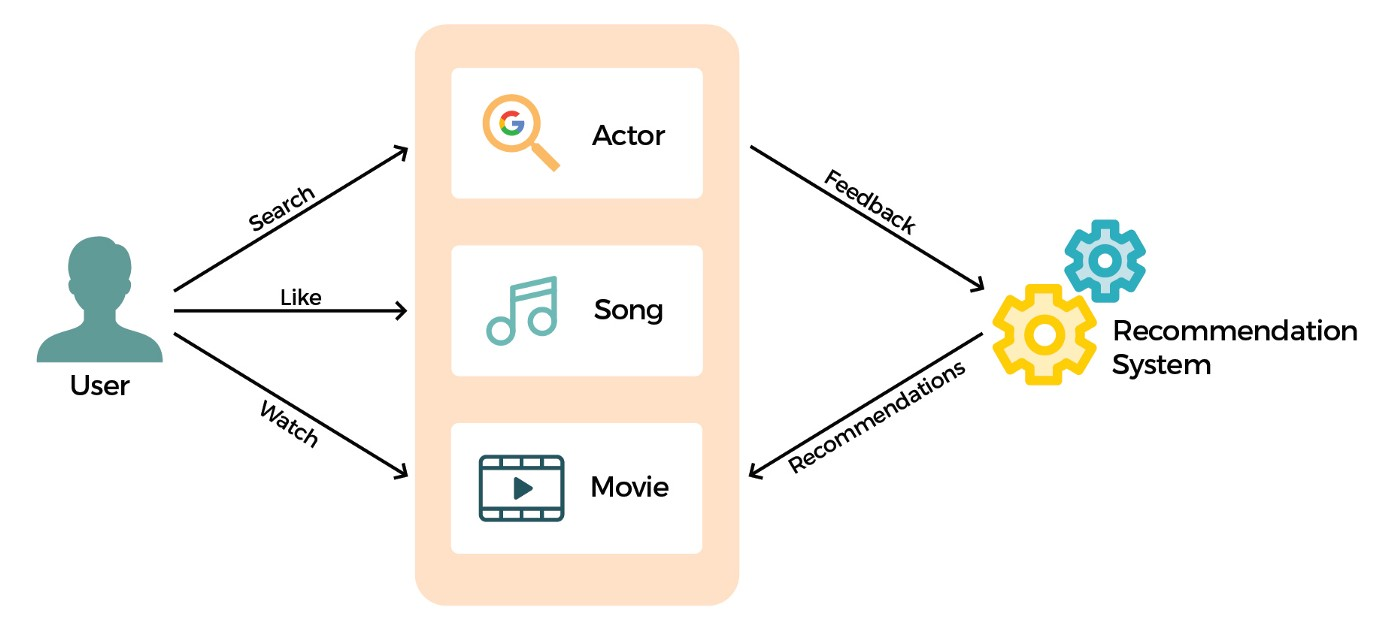




Recommender systems encompass a class of techniques and algorithms that can suggest 'relevant' items to users, in this case, movies. They pedict future behaviour based on past data and a combination of multiple algorithms.

We will commence by building;


*  `Collaborative Filtering Recommendation Systems` which harness all `Past data` of user interactions with the movies they have watch and ratings they have made both directly (actually rating the movie) or indirectly (i.e how long they dwelled on the movie).

<a id="two"></a>
# 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

In [1]:
!pip install numpy


In [2]:
!pip install surprise

In [ ]:
# Comet installation for Jupyter Notebook/Collab
!pip install comet_ml

# Keras installation
!pip install keras


In [3]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re
import surprise
# Ignore warnings 
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

# Building recommender systems
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import KNNWithMeans
from surprise import NMF
from surprise import SlopeOne
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create an experiment with your api key
from comet_ml import Experiment
experiment = Experiment(
    api_key="kMCcPoVg6efSLsemMAxlDEufr",
    project_name="nd2-mug-classification",
    workspace="mugambidk",
    log_code=True,
)

<a id="three"></a>
# 3. Load Data
<a href=#cont>Back to Table of Contents</a>

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

We'll be using this special version of the MovieLens dataset which is enriched with additional data, and resampled for fair evaluation purposes.

**Source**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

**Supplied Files**

* `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
* `genome_tags.csv` - user assigned tags for genome-related scores
* `imdb_data.csv` - Additional movie metadata scraped from IMDB using the links.csv file.
* `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* `sample_submission.csv` - Sample of the submission format for the hackathon.
* `tags.csv` - User assigned for the movies within the dataset.
* `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
* `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [4]:
movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation/movies.csv')
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation/imdb_data.csv')
tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation/tags.csv')
train = pd.read_csv('/kaggle/input/edsa-movie-recommendation/train.csv')
test = pd.read_csv('/kaggle/input/edsa-movie-recommendation/test.csv')

<a id="four"></a>
# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. On the following EDA we will explore the **MovieLens Dataset** to check for insight. We will be carrying out an extensive data analysis, descriptive statistics and data visualisations, all in the bid to give us an idea of what useful part of the data will be preprocessed in the Data Processing & feature engineering section in preparation for modeling. 

##### 4.1 Review Loaded Data

This first and the most important step in this project as a proper understanding on the data available will increase the chances of what we can do with it.

In [5]:
# Display the first 5 entries in each dataframe 
print('Movies Table')
display(movies.head())
print('ImDB Data')
display(imdb_data.head())
print('Tags')
display(tags.head())
print('Train')
display(train.head())

Movies Table


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


ImDB Data


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


Tags


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Train


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [6]:
# Count the number of unique entries for features of interest
unique_movies = len(movies['movieId'].unique().tolist())
unique_tags = len(tags['tag'].unique().tolist())
unique_users = len(train['userId'].unique().tolist())
unique_directors = len(imdb_data['director'].unique().tolist())
unique_actors = len(imdb_data['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('number of unique entries for features of interest')
display(unique.transpose())

number of unique entries for features of interest


,unique_entries
movies,62423
tags,73051
users,162541
directors,11787
actors,17144


For our experiment; we have a total of `162,541` participants in the rating of `62,423` unique movies. This is a pinch of vast number of movies and possible users but this is a reasonable satisfactory to fulfil the agenda of this project which to Model a Recommendation Machine which acts based on several conditions to tailoring down recommendations to suit each user.

In [7]:
# Determine and display the min and max ratings received
min_rating = train.rating.min()
max_rating = train.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

Lowest rating: 0.5
Highest rating: 5.0


#### Observations:

- There are a few tables with more information about the movies, these are all related by the movieId key
- Available information about each movie: Title, cast, runtime, budget, director, genre, plot keywords, tags and ratings
- There are just more than 60000 unique movies and 160000 unique users in the dataset
- There are more unique tags than unique movies in the dataset
- Movies are rated between 0 and 5 with the lowest rating being 0.5 and the highest 5 and most likely to be the target feature for Basic Recommendation i.e. if we are to recommend based on `userId` and `movieId` iteractions alone.
- Also as we can see, majority of our Observations fall within the RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`. This means that modelling by rating alone will not be entirely be representative of what the viewer may want since majority of ratings fall within the higher rates.
- We are also given the timestamp for each rating which isn't particularly useful for our model development since the time rating has nothing to do with a user's preferences or the quality of a film. The timestamps could, however, provide some meaningful insights in our EDA
-  Movie Contents/Types, User Preferences and other collaborative options, will have to be called into actions as distinguishing factor to tailoring down a recommendation to a user specification, which is what we want.

#### Preparing the data for better visualization
We start by selecting the movie features we want to investigate and create a new dataframe containing these features.

In [8]:
df = imdb_data[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


In [9]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[robinwilliams, jonathanhyde, kirstendunst]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[waltermatthau, jacklemmon, sophialoren]",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[whitneyhouston, angelabassett, lorettadevine]",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[stevemartin, dianekeaton, martinshort]",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


### Observation

1. From the IMDB Table: 
we can see, People/Users may tend to watch movies based on their `CAST` or `Director` but predominately the CAST and most people may be drawn to more `fight` oriented movies than `cowboy` or `animation`. Thus We will look to pick the `Title_cast` & `plot_keywords` Columns as potential features.

2. From the Movies Table:
Obviously the `genres` is will be an important ingredient to establish Movie Content; Viewers might be more interested in `Comedy` and not recommending movies having `ROMANCE` as a genre to CHILDREN. We could be sued for that. In Total we have availble over `62 thousand` distinct movies available for our training.



<a id="five"></a>
## 5. DATA PREPROCESSING
<a href=#cont>Back to Table of Contents</a>

The primary funtion of data processing is to provide Cleaner, Functional, Higher-Quality data, which is key to any successesful of data engineering and model building. It also enable more valuable insights to be extracted as well.

#### MovieLens rating distribution

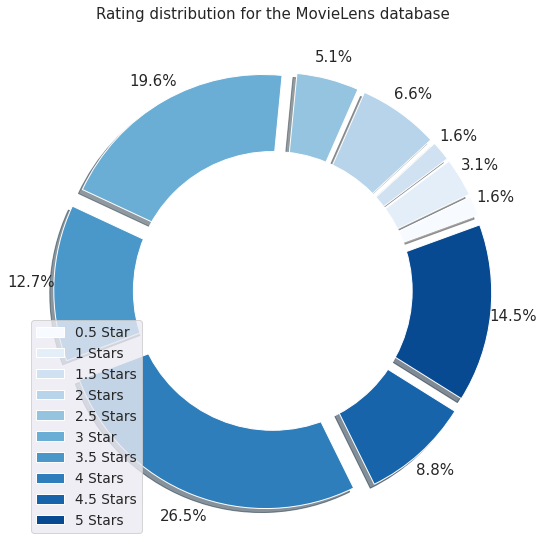

In [10]:
# Merge train with movies to join movie titles and ratings 
ratings = train.merge(movies, on='movieId', how='inner')
ratings.drop('timestamp', axis=1, inplace=True)

# Count how many ratings are in each category (1 star, 2 star, ect)
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Blues')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Rating distribution for the MovieLens database\n', fontsize=15)
plt.tight_layout()
plt.show()

#### Distribution of average ratings

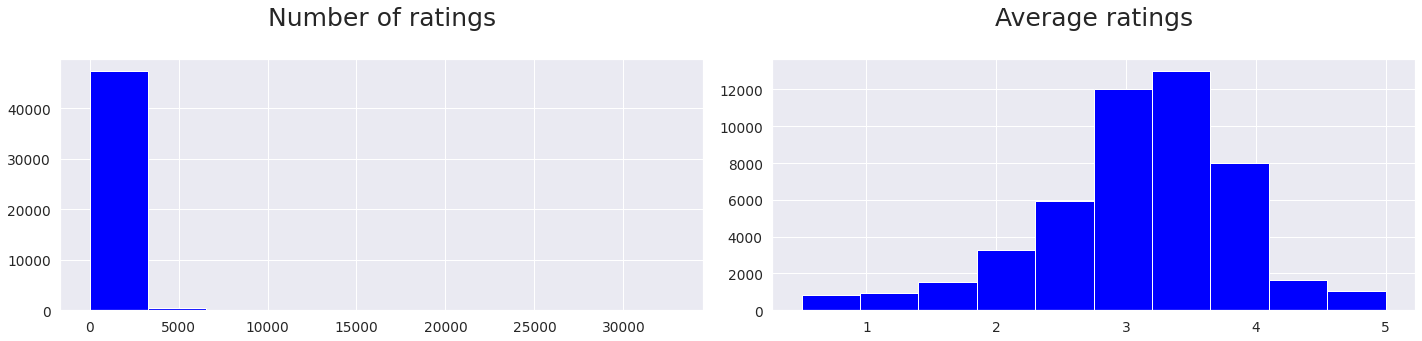

In [11]:
# Determine the average rating and number of ratings for each movie
ratings_mean_count = pd.DataFrame(ratings.groupby(['title'])[['rating']].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count())
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())

# Create a plot of the number of ratings 
f, axarr = plt.subplots(1,2, figsize=(20,5))
axarr[0].hist(ratings_mean_count['rating_counts'], bins=10, color='Blue')
axarr[0].set_title('Number of ratings\n', fontsize=25)

# Create a plot showing the average ratings distribution 
axarr[1].hist(ratings_mean_count['rating'], bins=10, color='Blue')
axarr[1].set_title('Average ratings\n', fontsize=25)

# Display both plots
plt.tight_layout()
plt.show()

##### Release Year of different movies

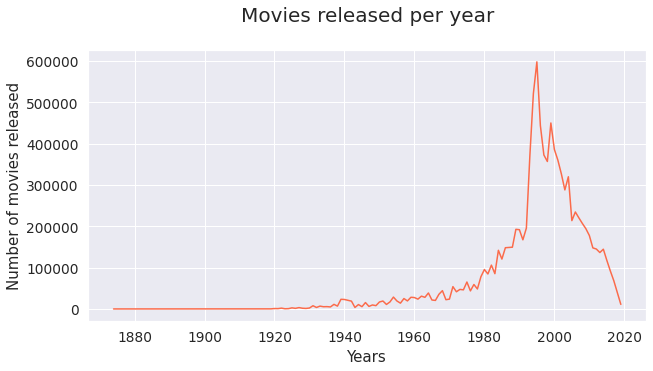

In [12]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

#### Best Movies

In [13]:
# Extract and display the 10 most popular films in the dataset 
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(10)
ratings_mean_count.head(10)

,rating,rating_counts,popularity
title,,,
"Shawshank Redemption, The (1994)",4.417624,32831,145035.0
Pulp Fiction (1994),4.195097,31697,132972.0
Forrest Gump (1994),4.047216,32383,131061.0
"Silence of the Lambs, The (1991)",4.144172,29444,122021.0
"Matrix, The (1999)",4.154253,29014,120531.5
Star Wars: Episode IV - A New Hope (1977),4.111811,27560,113321.5
Schindler's List (1993),4.247625,24004,101960.0
Fight Club (1999),4.227906,23536,99508.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.146236,22956,95181.0


Let's take a closer look at how the ratings for the most popular movie are distributed - Shawshank Redemption

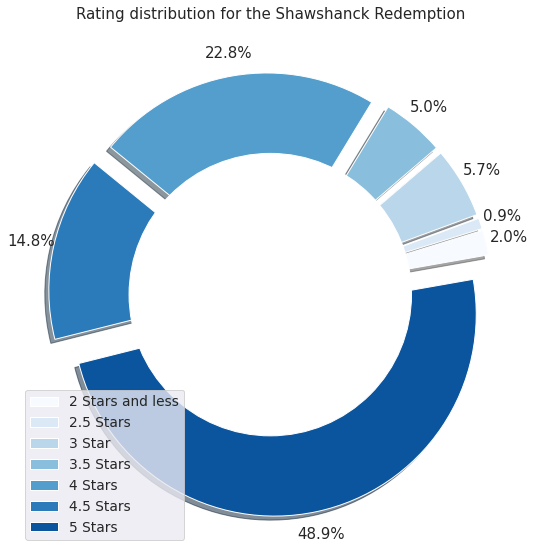

In [14]:
# Extract shawshank redemption ratings
top = ratings[ratings['title']=='Shawshank Redemption, The (1994)']

# Group all 2 star and lower ratings together
top.rating[top.rating == 0.5] = 2 
top.rating[top.rating == 1] = 2 
top.rating[top.rating == 1.5] = 2 

# Count how many ratings are in each category: 1 star, 2 star, ect
grouped = pd.DataFrame(top.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Create the figure
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create the colour palette
labels = ['2 Stars and less', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Blues')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create the pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 #labels=labels, 
                 shadow=True,
                 startangle=10,
                 pctdistance=1.115,
                 explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
   
# Turn the pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the donut chart with a legend
ax.set_title('Rating distribution for the Shawshanck Redemption\n', fontsize=15)
plt.legend(pie[0], labels, loc="lower left")
plt.tight_layout()
plt.show()

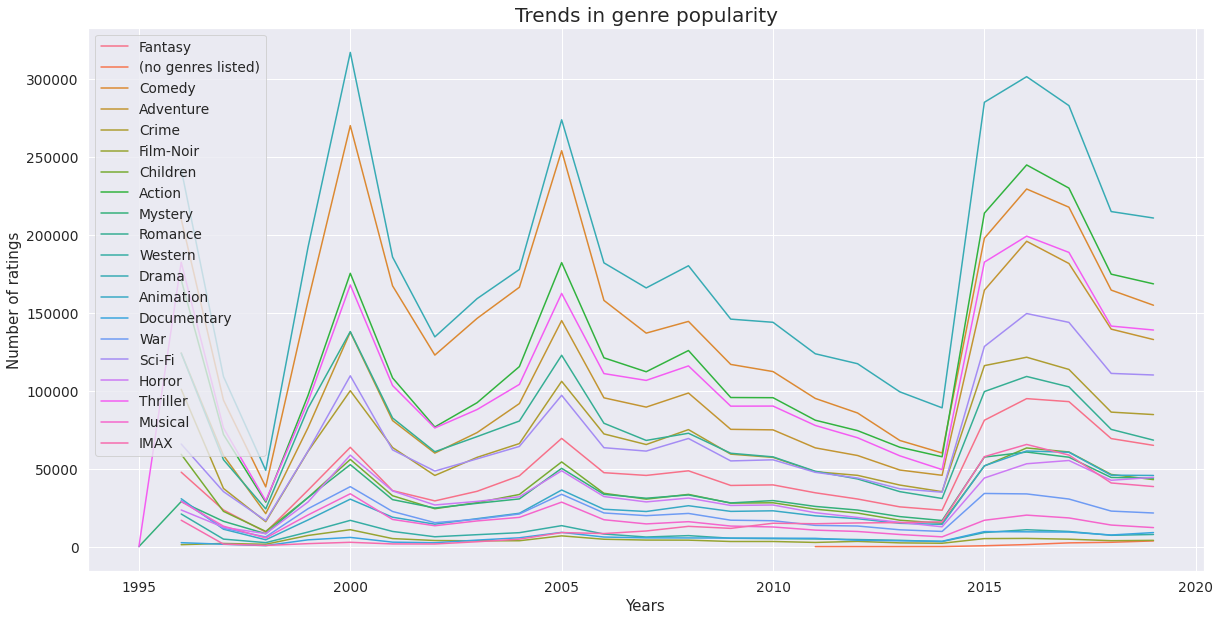

In [15]:
def most_watched(input_df):  
    """"
    This function creates a plot showing the popularity of each genre 
    over the last 50 years.
    
    Input: input_df
           datatype: DataFrame
           
    Output: None
    
    """   
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(20,10))
    plot = sns.lineplot(data=b, dashes=False)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(train)

Looking at the graph, we can tell that Drama, Comedy, Thriller and Romance stand out as the popular movie genres.
Lets have a look at the most frequently occuring plot keywords in the movielens dataset to get futher insight.

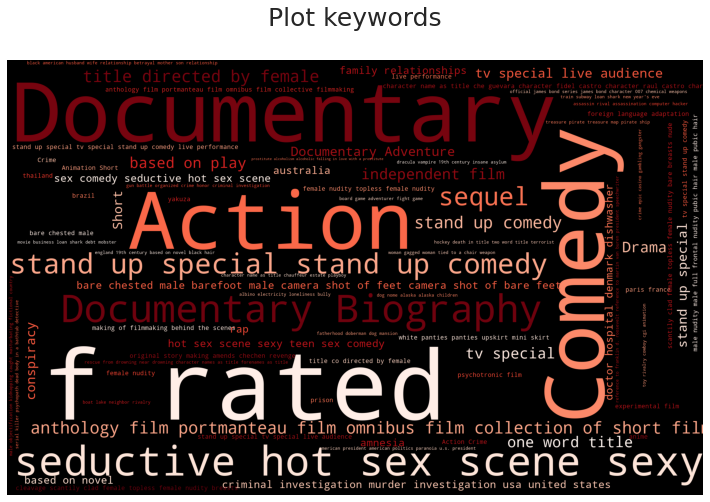

In [16]:
def wordcloud_generator(df, column):  
    """
    This function extracts all the unique keywords in a column
    and counts the number of times each keyword occurs in the column
    while ignoring words that are not meaningful.
    these keywords are then used to generate a word cloud 
    
    Input: df
           datatype: DataFrame
           column
           datatype: str
           
    Output: wordcloud
            Datatype: None
            
    """    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 

# Plot wordcloud
plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

Movie directors

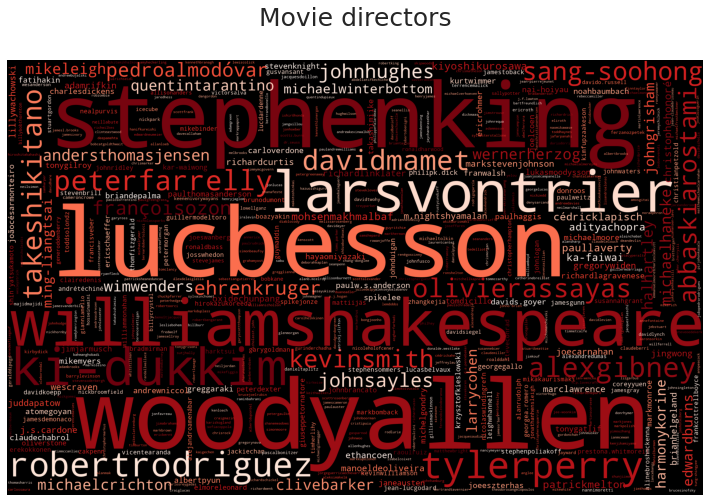

In [17]:
# Generate a WordCloud using the movie directors  
directors = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

Actors

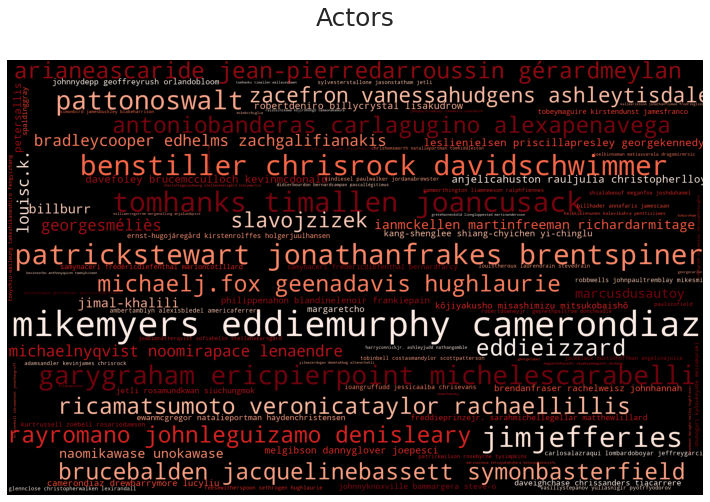

In [18]:
# Generate a wordcloud using the 2000 most frequently occuring actors' names in the dataset
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
actors = wordcloud_generator(df, 'title_cast')

# plot the WordCloud                        
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors\n', fontsize=25)
plt.show()

Before we move on to building our recommender system it's good practice (and in this case, very necessary) to free up some memory by deleting the variables/dataframes we're done using

In [19]:
del top
del tags
del grouped
del ratings
del ratings_mean_count

<a id="six"></a>
# 6. MODELLING
<a href=#cont>Back to Table of Contents</a>

we would be considering 2 approaches:
* Content based approach
* Collaborative based approach


## 6.1 CONTENT BASED APPROACH

We will be using the cast, director, plot keywords and genre as the metadata for our content based recommender system. These columns will be combined to form the corpus for each film which will then be used to determine the similarity between films

![content%20based-4.png](attachment:content%20based-4.png)

In this approach, a description of the movie and a profile of the user's preferences serve as the foundation. These techniques work best when information about the movie (name, location, description, etc.) but not the user is known. Content-based recommenders approach recommendations as a user-specific classification issue and learn a classifier for a user's preferences based on the characteristics of a movie.

There are different methods of calculating the similarity between vectors. These include the jaccard index, Euclidean, Cosine, Pearson Correlation similarity coefficients etc. We would be considering 2 approaches:
* TF-IDF vectorizer
* Cosine Similarity

In [20]:
# Creating an empty column and list to store the corpus for each movie
df['corpus'] = ''
corpus = []

# List of the columns we want to use to create our corpus 
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df['movieId'])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    corpus.append(words)

# Add the corpus information for each movie to the dataframe 
df['corpus'] = corpus
df.set_index('movieId', inplace=True)

# Drop the columns we don't need anymore to preserve memory
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head()

,title,corpus
movieId,,
1,Toy Story (1995),tomhanks timallen donrickles johnlasseter toy ...
2,Jumanji (1995),robinwilliams jonathanhyde kirstendunst jonath...
3,Grumpier Old Men (1995),waltermatthau jacklemmon sophialoren marksteve...
4,Waiting to Exhale (1995),whitneyhouston angelabassett lorettadevine ter...
5,Father of the Bride Part II (1995),stevemartin dianekeaton martinshort alberthack...


Our corpus will be converted into a bag of words using the TF-IDF vectorizer

### 6.1.1   Term Frequency (TF) and Inverse Document Frequency (IDF) TF-IDF vectorizer

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

We will consider genres as an important parameter to recommend user the movie he watches based on generes of movie user has already watched.

![](https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336)

In [21]:
#create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
vec = tf.fit_transform(df['corpus'])

### 6.1.2 Cosine Similarity

Cosine similarity is the cosine of the angle between two vectors and it is used as a distance evaluation metric between two points in the plane. The cosine similarity measure operates entirely on the cosine principles where with the increase in distance the similarity of data points reduces.

When it comes to machine learning, cosine similarity can be utilized for a variety of classification data and can be used to assist us identify the nearest neighbors when employed as an evaluation measure in the KNN method. Cosine similarity finds its main application for character types of data. Similar to cosine angles, cosine similarity is employed in the recommendation system. For lower cosine similarity, the material would be deemed the least recommended, and for higher cosine similarity, the generated recommendations would be at the top. In order to compare the similarity between the vectorized texts and the original text document, cosine similarity is also employed in textual data.

![cosine%20similarity-2.png](attachment:cosine%20similarity-2.png)


In [22]:
cos_sim = cosine_similarity(vec, vec)
print(cos_sim.shape)
cos_sim

(24866, 24866)


array([[1.        , 0.02601059, 0.04019328, ..., 0.00592263, 0.        ,
        0.01682672],
       [0.02601059, 1.        , 0.        , ..., 0.02850676, 0.        ,
        0.01630372],
       [0.04019328, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00592263, 0.02850676, 0.        , ..., 1.        , 0.        ,
        0.0059992 ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01682672, 0.01630372, 0.        , ..., 0.0059992 , 0.        ,
        1.        ]])

Top-N Recommendations

In [23]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    Input: title
           Datatype: str
           
           n (default = 10)
           Datatype: int
    """ 
    # Create a a copy of the input dataframe where the index has been reset
    df1 = df.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=df['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Ice Age (2002)').head(10)

10648                       Ice Age 2: The Meltdown (2006)
18129                  Ice Age 4: Continental Drift (2012)
13437                Ice Age: Dawn of the Dinosaurs (2009)
22661                  Ice Age: A Mammoth Christmas (2011)
2050                              American Tail, An (1986)
8854     Asterix vs. Caesar (Astérix et la surprise de ...
8875     Asterix in Britain (Astérix chez les Bretons) ...
17324    Asterix and the Big Fight (Astérix et le coup ...
21934     Bugs Bunny's 3rd Movie: 1001 Rabbit Tales (1982)
Name: title, dtype: object

## 6.2 COLLABORATIVE BASED APPROACH

Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. The system generates recommendations using only information about rating profiles for different users or items. By locating peer users/items with a rating history similar to the current user or item, they generate recommendations using this neighborhood. Collaborative filtering methods are classified as memory-based and model-based.

This filtration method is based on combining the user's behavior with contrasting and comparing it to the behavior of other users in the database. This algorithm heavily relies on the past activity of all users. The primary distinction between content-based filtering and collaborative filtering is that in the latter, user interactions with the items affect the algorithm used to make recommendations, whereas for content-based filtering, only the data of the concerned user is taken into account.

The collaborative approach can be applied in several ways:
* Memory based
* Model based 

![alt text](https://cdn-images-1.medium.com/max/1500/1*7uW5hLXztSu_FOmZOWpB6g.png)

### 6.2.1 Memory Based Approach

The memory-based approach uses user rating data to compute the similarity between users or items. Typical examples of this approach are neighbourhood-based CF and item-based/user-based top-N recommendations.
There are two ways to implement this approach:
* User-Item Filtering
* Item-Item Filtering

In either scenario, we builds a similarity matrix. For user-item collaborative filtering, the user-similarity matrix will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

## Memory Based Approach
 ![alt text](https://cdn-images-1.medium.com/max/1500/1*QvhetbRjCr1vryTch_2HZQ.jpeg)

In either scenario, we builds a similarity matrix. For user-user collaborative filtering, the user-similarity matrix will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

There are 3 distance similarity metrics that are usually used in collaborative filtering:

- **Jaccard Similarity**
- **Cosine Similarity** 
- **Pearson Similarity** 

### 6.2.2 Model Based Approach

In this approach, models are developed using different data mining, machine learning algorithms to predict users' rating of unrated items. There are many model-based CF algorithms. Bayesian networks, clustering models, latent semantic models such as singular value decomposition, probabilistic latent semantic analysis, multiple multiplicative factor, latent Dirichlet allocation and Markov decision process based models.

For this approach, we would consider `Surprise` which is an easy-to-use Python scikit for recommender systems. Surprise stands for 'Simple Python Recommender System Engine'.

To use the surprise algorithms, we first have to define a reader variable. We would train the following algorithms and evaluate based on their `RMSE` value:
* BaselineOnly
* SVD
* CoClustering
* Non-Negative Matrix Factorization (NMF)


In [24]:
# Creating a small test dataframe to evaluate our models
tests = train.copy()
tests.drop(['timestamp'], axis=1, inplace=True)
tests = tests.head(10000)

# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(tests[['userId','movieId','rating']], reader)

# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1108  1.0917  1.1081  1.1118  1.1255  1.1096  0.0108  
Fit time          2.25    2.46    2.49    2.43    2.49    2.42    0.09    
Test time         0.03    0.02    0.02    0.02    0.02    0.02    0.00    


## Item-Item Filtering
Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.


Item-item collaborative filtering was invented and used by Amazon.com
![alt text](https://cdn-images-1.medium.com/max/1600/1*skK2fqWiBF7weHU8SjuCzw.png)
ITEM-ITEM collaborative filtering look for items that are similar to the articles that user has already rated and recommend most similar articles. But what does that mean when we say item-item similarity? In this case we don’t mean whether two items are the same by attribute like Fountain pen and pilot pen are similar because both are pen. Instead, what similarity means is how people treat two items the same in terms of like and dislike.

In [25]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}  

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model 
cv = cross_validate(item_based, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0888  1.0655  1.1148  1.0704  1.0920  1.0863  0.0175  
Fit time          0.44    0.41    0.43    0.43    0.42    0.43    0.01    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


**NMF**: Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements

In [26]:
# Evaluate the model 
NMF = NMF(random_state=0)
cv = cross_validate(NMF, test_data, cv=5, measures=['RMSE'], verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1255  1.1223  1.0672  1.1257  1.1401  1.1162  0.0252  
Fit time          1.48    1.49    1.51    1.51    1.49    1.50    0.02    
Test time         0.02    0.02    0.01    0.02    0.02    0.02    0.00    


**Singular value decomposition (SVD)** is a matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m)

SVD is similar to Principal Component Analysis (PCA), but more general.



In [27]:
# Evaluate the model 
svd = SVD(random_state=0)
cv = cross_validate(svd, test_data, cv=5, measures=['RMSE'], verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0485  1.0486  1.0445  1.0107  1.0574  1.0420  0.0162  
Fit time          0.65    0.63    0.65    0.65    0.66    0.65    0.01    
Test time         0.01    0.01    0.01    0.01    0.02    0.01    0.00    


In [28]:
# Train the model on the entire dataset 
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train[['userId','movieId','rating']], reader)
trainingSet = data.build_full_trainset()
svd.fit(trainingSet)

# Make predictions using the trained model
pred = [svd.predict(test.userId[i],test.movieId[i]).est for i in test.index]
test['rating'] = pred

In [29]:
# Create the csv file for submission
test['Id'] = test['userId'].astype(str)+'_'+test['movieId'].astype(str)
test = test[['Id','rating']]


In [30]:
test

,Id,rating
0,1_2011,3.079354
1,1_4144,4.242573
2,1_5767,3.634281
3,1_6711,4.460075
4,1_7318,2.248208
...,...,...
5000014,162541_4079,3.312836
5000015,162541_4467,3.791687
5000016,162541_4980,2.556480
5000017,162541_5689,2.900460


In [31]:
test.to_csv('svd_submission5.csv', index=False)

In [ ]:
# pickle/save base model for Streamlit web deployment
filename = "svd_model.pkl"
#with open(filename,'wb') as file:
pickle.dump(svd,open(filename, 'wb'))

In [ ]:
# End the experiment and display the parameters on Comet
experiment.end()

<a id="seven"></a>
# 7. CONCLUSION
<a href=#cont>Back to Table of Contents</a>


In conclusion, we have been able to try different approaches to building a recommender system. We have looked at the content based approach and the collaborative based approach and have been able to observe the differences in both. The approach to be used would be determined by the user and the features available.

<a id="eight"></a>
# 8. APPENDIX
<a href=#cont>Back to Table of Contents</a>

1. Recommender Systems: https://en.wikipedia.org/wiki/Recommender_system
2. Cosine Simitarity: https://analyticsindiamag.com/cosine-similarity-in-machine-learning/
